In [1]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library

#### Analyzing Movies Dataset

In [2]:
movies= pd.read_csv('movies.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#Verifying if all movies are unique
unique_movies = movies['movieId'].unique().tolist()
print(movies.shape)
print(len(unique_movies))

(27278, 3)
27278


#### Analyzing ratings dataset

In [5]:
ratings=pd.read_csv('ratings.csv',sep=',')

In [6]:
ratings['rating'].min() 

0.5

In [7]:
ratings['rating'].max()

5.0

#### Analyzing tags dataset

In [8]:
tags=pd.read_csv('tags.csv',sep=',')

In [9]:
unique_tags=tags['tag'].unique().tolist()
len(unique_tags)

38644

#### Data Cleaning

In [10]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [13]:
tags=tags.dropna()

In [14]:
unique_tags=tags['tag'].unique().tolist()
len(unique_tags)

38643

In [15]:
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userId,1048575.0,3.527086e+03,2.018424e+03,1.0,1813.0,3.540000e+03,5.233000e+03,7.120000e+03
movieId,1048575.0,8.648988e+03,1.910014e+04,1.0,903.0,2.143000e+03,4.641000e+03,1.306420e+05
rating,1048575.0,3.529272e+00,1.051919e+00,0.5,3.0,4.000000e+00,4.000000e+00,5.000000e+00
timestamp,1048575.0,1.096036e+09,1.594899e+08,825499934.0,965838177.0,1.099263e+09,1.217407e+09,1.427764e+09


In [16]:
tags.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userId,465548.0,6.871068e+04,4.187741e+04,1.800000e+01,2.878000e+04,7.020100e+04,1.072560e+05,1.384720e+05
movieId,465548.0,3.262839e+04,3.608056e+04,1.000000e+00,2.571000e+03,7.373000e+03,6.224500e+04,1.312580e+05
timestamp,465548.0,1.298714e+09,7.920819e+07,1.135429e+09,1.245008e+09,1.302297e+09,1.366218e+09,1.427771e+09


In [17]:
del ratings['timestamp']
del tags['timestamp']

#### Data Analysis

In [18]:
movies['year'] =movies['title'].str.extract('.*\((.*)\).*',expand = False)

In [19]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [20]:
movies['title']=movies['title'].replace(r'\(.*', '', regex=True)

In [21]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [26]:
unique_years=movies['year'].unique().tolist()
print(unique_years)

['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993', '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989', '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955', '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950', '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934', '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945', '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978', '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927', '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923', '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915', '2004', '1916', '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008', '2009', '1912', '2010', 'Das Millionenspiel', '1913', '2011', '1898', '1899', 'Bicicleta, cullera, poma', '1894', '2012', '1909', '1910', '1901', '1893', '2013', '1896', '1983)', '2014', '2009– ', '2007-', '1975-1979',

In [36]:
print(movies.loc[movies['year'] == 'Das Millionenspiel'])

       movieId                title                        genres  \
15646    79607  Millions Game, The   Action|Drama|Sci-Fi|Thriller   

                     year  
15646  Das Millionenspiel  


In [37]:
print(movies.loc[movies['year'] == 'Bicicleta, cullera, poma'])

       movieId                   title       genres                      year
17341    87442  Bicycle, Spoon, Apple   Documentary  Bicicleta, cullera, poma


In [38]:
print(movies.loc[movies['year'] == '1975-1979'])

       movieId           title  genres       year
22679   108583  Fawlty Towers   Comedy  1975-1979


In [32]:
movies['year']=movies['year'].replace(r'\).*', '', regex=True)

In [39]:
movies=movies.drop(movies.index[[15646, 17341,22679]])
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [44]:
movies['year']=movies['year'].replace(r'\–.*', '', regex=True)

In [45]:
unique_years=movies['year'].unique().tolist()
print(unique_years)

['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993', '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989', '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955', '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950', '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934', '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945', '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978', '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927', '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923', '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915', '2004', '1916', '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008', '2009', '1912', '2010', '1913', '2011', '1898', '1899', '1894', '2012', '1909', '1910', '1901', '1893', '2013', '1896', '2014', '1895', '2015', '1900', '1905', '1891']


In [46]:
movies.isnull().sum()

movieId     0
title       0
genres      0
year       17
dtype: int64

In [48]:
movies = movies.dropna()
movies.isnull().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

In [50]:
#Converting the year column from str to int
movies['year'] = pd.to_numeric(movies['year'])

In [51]:
movies['year'].min()

1891

In [52]:
movies['year'].max()

2015

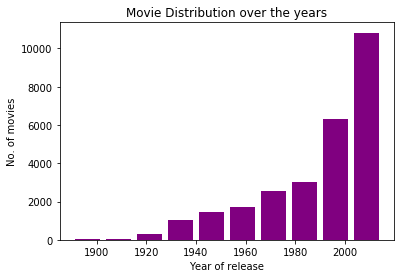

In [68]:
years = movies['year'].tolist()
# setting the ranges and no. of intervals 
range = (1890, 2015) 
bins = 10  
  
# plotting a histogram 
plt.hist(years, bins, range, color = 'purple', 
        histtype = 'bar', rwidth = 0.8) 
  
# x-axis label 
plt.xlabel('Year of release') 
# frequency label 
plt.ylabel('No. of movies') 
# plot title 
plt.title('Movie Distribution over the years') 
  
# function to show the plot 
plt.show() 

In [101]:
movie_ratings=movies.merge(ratings,on = 'movieId',how = 'inner')
movie_ratings.tail(10)

,movieId,title,genres,year,userId,rating
1048550,129428,The Second Best Exotic Marigold Hotel,Comedy|Drama,2015,3289,3.5
1048551,129428,The Second Best Exotic Marigold Hotel,Comedy|Drama,2015,5832,3.0
1048552,129707,The Lazarus Effect,Horror|Thriller,2015,3453,0.5
1048553,130052,Clown,Drama|Horror,2014,3858,1.0
1048554,130073,Cinderella,Adventure|Children|Drama|Sci-Fi,2015,4450,2.5
1048555,130219,The Dark Knight,Action|Crime|Drama|Thriller,2011,1339,4.5
1048556,130462,The Boy,Unknown Genre,2015,5731,4.0
1048557,130490,Insurgent,Action|Romance|Sci-Fi,2015,2423,1.0
1048558,130490,Insurgent,Action|Romance|Sci-Fi,2015,3397,3.5
1048559,130642,Backcountry,Drama|Horror|Thriller,2014,3858,3.0


In [112]:
most_rated = movie_ratings.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Pulp Fiction                                       3498
Forrest Gump                                       3476
Silence of the Lambs, The                          3247
Shawshank Redemption, The                          3216
Jurassic Park                                      3129
Star Wars: Episode IV - A New Hope                 2874
Braveheart                                         2799
Terminator 2: Judgment Day                         2711
Matrix, The                                        2705
Schindler's List                                   2598
Fugitive, The                                      2570
Toy Story                                          2569
Independence Day                                   2546
Apollo 13                                          2512
Usual Suspects, The                                2490
Star Wars: Episode VI - Return of the Jedi         2480
Batman                                             2440
Star Wars: Episode V - The Empire Strikes 

In [102]:
#Extracting unique genres from genre list
genres=[]
for x in movies['genres']:
    temp=[]
    temp=x.split('|')
    for y in temp:
        if(y not in genres):
            genres.append(y)
print(genres)  
print(len(genres))

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', 'Unknown Genre']
20


In [103]:
movies = movies.replace(to_replace ="(no genres listed)", value ="Unknown Genre") 

In [108]:
movie_ratings.tail(10)

,movieId,title,genres,year,userId,rating
1048550,129428,The Second Best Exotic Marigold Hotel,Comedy|Drama,2015,3289,3.5
1048551,129428,The Second Best Exotic Marigold Hotel,Comedy|Drama,2015,5832,3.0
1048552,129707,The Lazarus Effect,Horror|Thriller,2015,3453,0.5
1048553,130052,Clown,Drama|Horror,2014,3858,1.0
1048554,130073,Cinderella,Adventure|Children|Drama|Sci-Fi,2015,4450,2.5
1048555,130219,The Dark Knight,Action|Crime|Drama|Thriller,2011,1339,4.5
1048556,130462,The Boy,Unknown Genre,2015,5731,4.0
1048557,130490,Insurgent,Action|Romance|Sci-Fi,2015,2423,1.0
1048558,130490,Insurgent,Action|Romance|Sci-Fi,2015,3397,3.5
1048559,130642,Backcountry,Drama|Horror|Thriller,2014,3858,3.0


#### Separating into genres

In [121]:
action_movies = movies['genres'].str.contains('Action')
adventure_movies = movies['genres'].str.contains('Adventure')
animation_movies = movies['genres'].str.contains('Animation')
children_movies = movies['genres'].str.contains('Children')
comedy_movies = movies['genres'].str.contains('Comedy')
crime_movies = movies['genres'].str.contains('Crime')
documentary_movies = movies['genres'].str.contains('Documentary')
drama_movies = movies['genres'].str.contains('Drama')
fantasy_movies = movies['genres'].str.contains('Fantasy')
film_noir_movies = movies['genres'].str.contains('Film-Noir')
horror_movies = movies['genres'].str.contains('Horror')
imax_movies = movies['genres'].str.contains('IMAX')
mystery_movies = movies['genres'].str.contains('Mystery')
musical_movies = movies['genres'].str.contains('Musical')
romantic_movies = movies['genres'].str.contains('Romance')
scifi_movies = movies['genres'].str.contains('Sci-Fi')
thriller_movies = movies['genres'].str.contains('Thriller')
unknown = movies['genres'].str.contains('Unknown Genre')
war_movies = movies['genres'].str.contains('War')
western_movies = movies['genres'].str.contains('Western')

In [122]:
action_movies = movies[action_movies]
adventure_movies = movies[adventure_movies]
animation_movies = movies[animation_movies]
children_movies = movies[children_movies]
comedy_movies = movies[comedy_movies]
crime_movies = movies[crime_movies]
documentary_movies = movies[documentary_movies]
drama_movies = movies[drama_movies]
fantasy_movies = movies[fantasy_movies]
film_noir_movies = movies[film_noir_movies]
horror_movies = movies[horror_movies]
imax_movies = movies[imax_movies]
mystery_movies = movies[mystery_movies]
musical_movies = movies[musical_movies]
romantic_movies = movies[romantic_movies]
scifi_movies = movies[scifi_movies]
thriller_movies = movies[thriller_movies]
war_movies = movies[war_movies]
western_movies = movies[western_movies]
unknown = movies[unknown]

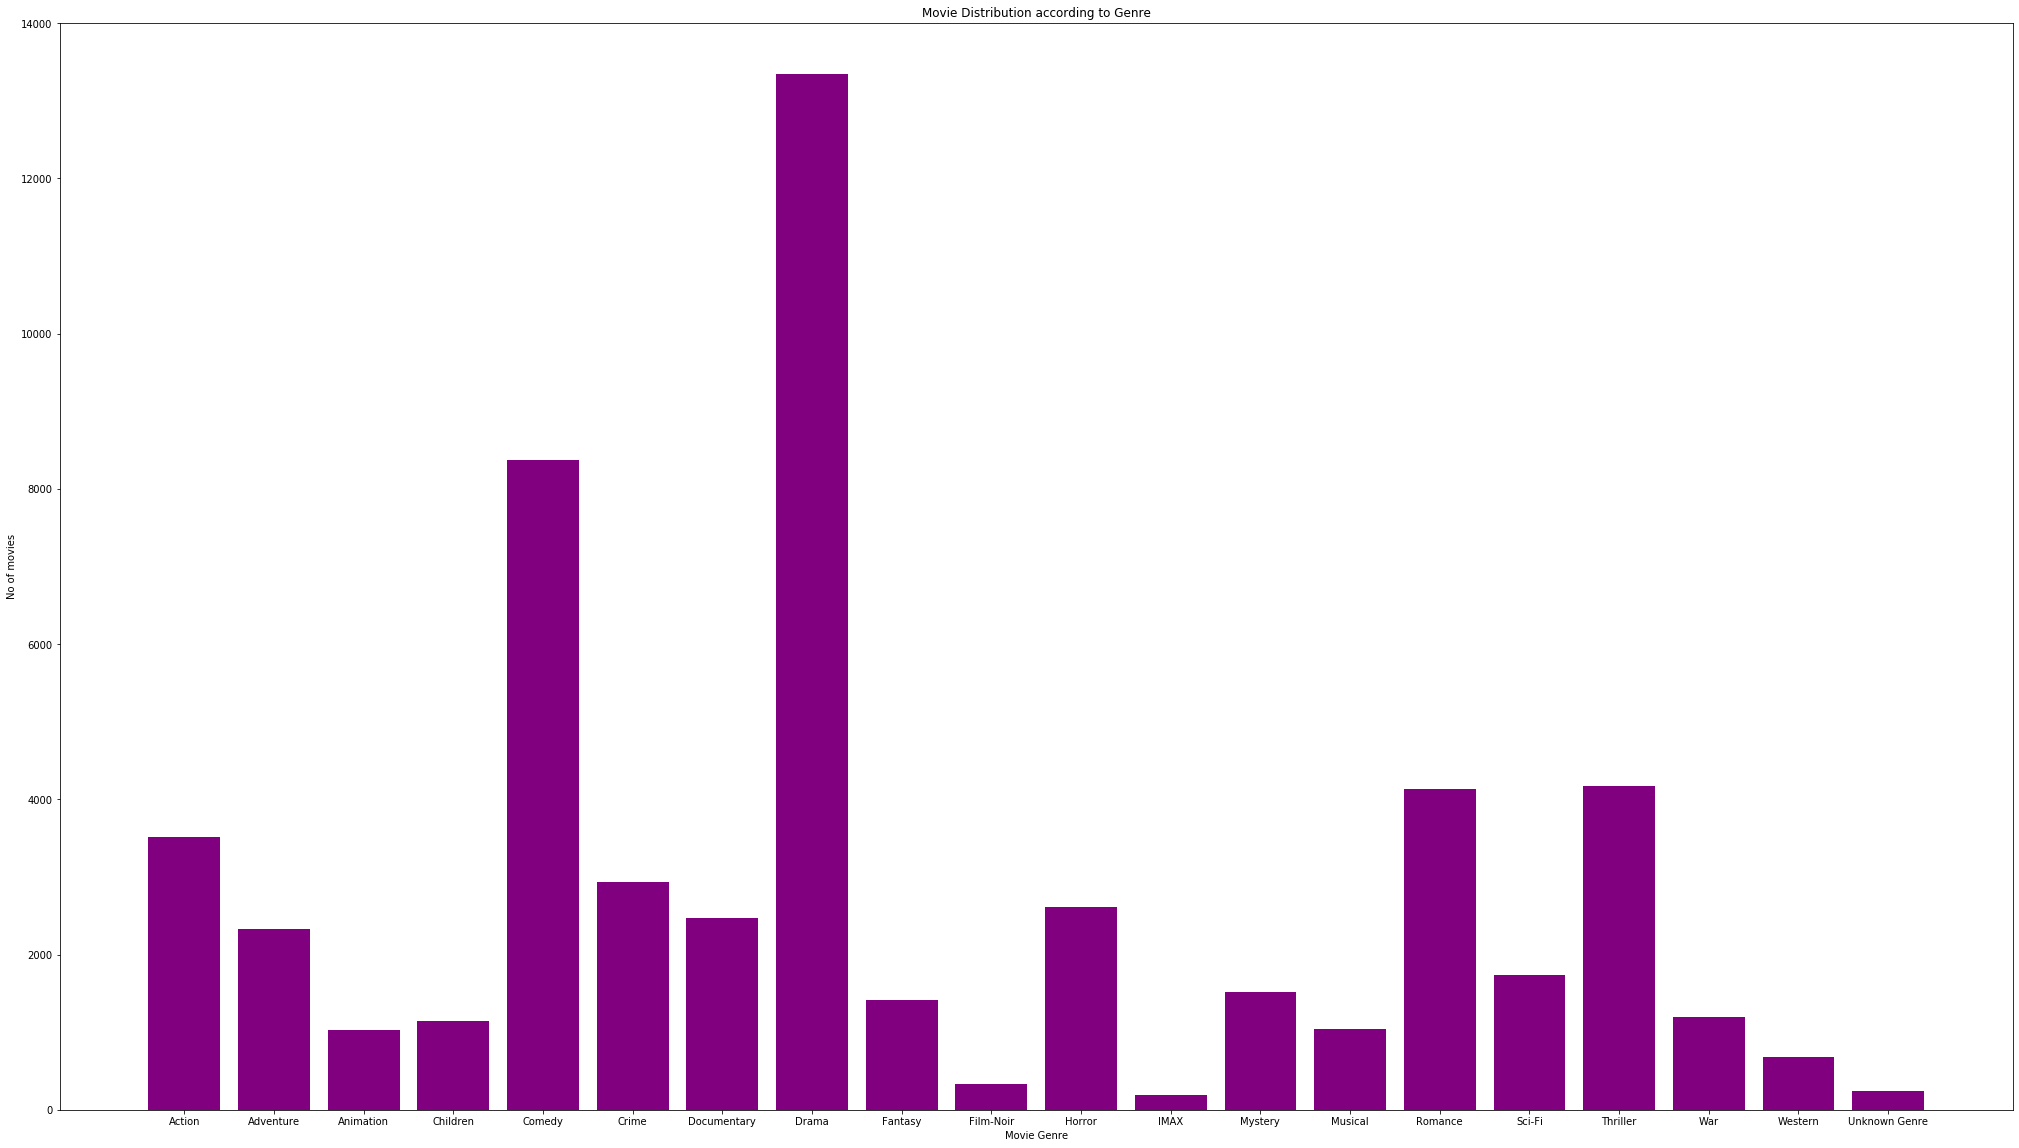

In [153]:
from matplotlib.pyplot import figure

genre = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
  
# heights of bars 
height = [len(action_movies.index), len(adventure_movies.index), len(animation_movies.index), len(children_movies.index), 
         len(comedy_movies.index), len(crime_movies.index), len(documentary_movies.index), len(drama_movies.index), 
         len(fantasy_movies.index), len(film_noir_movies.index), len(horror_movies.index), len(imax_movies.index), 
         len(mystery_movies.index), len(musical_movies.index), len(romantic_movies.index), len(scifi_movies.index), 
         len(thriller_movies.index), len(war_movies.index), len(western_movies.index), len(unknown.index)] 
  
# labels for bars 
tick_label = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
             'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
             'Horror', 'IMAX', 'Mystery', 'Musical', 'Romance',
             'Sci-Fi', 'Thriller', 'War', 'Western', 'Unknown Genre',] 
# plotting a bar chart 
plt.bar(genre, height, tick_label = tick_label, 
        width = 0.8, color = ['purple']) 

# naming the x-axis 
plt.xlabel('Movie Genre') 
# naming the y-axis 
plt.ylabel('No of movies') 
# plot title 
plt.title('Movie Distribution according to Genre') 
  
plt.rcParams["figure.figsize"] = [25,20]
# function to show the plot 
plt.show()